# La Tabla del Carnicero (Butcher's Table)

## Introducción

Ya hemos introducido dos métodos numéricos para resolver ecuaciones diferenciales, a saber el método de **Euler** y el de **Runge-Kutta*.

Se preguntará el espectador, ¿Existen más?

**¡Por suspuesto que sí!**

Hoy veremos una forma de construir muchos más mediante un proceso mnemotécino llamado la **Tabla de Butcher**.

**No olvidemos nuestro foco de atención**,

$$\frac{dx}{dt}=f(t,x),\text{     }x(t_{0})=x_{0}$$

esto es, la tasa de cambio instantáneo de la cantidad dependiente $x$, se puede modelar mediante la función $f(t,x)$. Además el experimento comienza en el momento $t_0$ con una cantidad inicial $x_0$ de la cantidad $x$.

## Definición

La tabla del carnicero es una regla mnemotécnica que ayuda a construir métodos numéricos ya conocidos mediante una tabla que resume su información. 

El objetivo de esta lección será acostumbrarnos a la notación de tabla para construir y programar el respectivo método, así como el proceso inverso, esto es, ir del método numérico a la tabla.

Esto es muy importante, pues el entender la tabla genera un proceso de abstracción importante en nuestro cerebro que nos hará entender la estrucutra interna de los llamados **métodos numéricos explícitos** para resolver ecuaciones diferenciales.

El proceso se puede resumir con las siguiente gráficas (Tomadas de [Wikipedia](https://wikimedia.org/api/rest_v1/media/math/render/svg/44d56b38e104bfdf185d1307337e5c6e074b16c9)):

**Ir de**

![Tabla](/files/Pictures/Butcher.png)


**Para construir el método**

![MetNum](https://wikimedia.org/api/rest_v1/media/math/render/svg/44d56b38e104bfdf185d1307337e5c6e074b16c9)

![Predictor](https://wikimedia.org/api/rest_v1/media/math/render/svg/84fa47cf3289c5ab2067fe46f748f33d4b6be48c)

**y vicerversa. Recuerde que en nuestro problema, $x$ hace el papel de la $y$ mostrada arriba.**

Aunque esto puede ser un poco confuso al principio, iremos paso a paso a paso para ver cómo se hace dicha transformación.

- **c's:** Representan dos cosas:

    1. Cuántos **k's** necesitamos definir para construir todo el método numérico.
    2. Cuánto se le va a sumar a $t_i$ en multiplcación con $h$ en $f(t_i,\dots)$ **antes de la coma**.
    
   
- **a's:** Representan cuánto de cada k se le debe agregar a la función en multiplicación con $h$ $f(\dots,x_i)$ **después de la coma**.

- **b's:** Ayudan a construir la función **predictora** del método (futuro = presente + paso\*( comb. lineal de **b's** y **k's**). 

## Ejemplos básicos

### Método de Euler

![Tabla](/files/Pictures/BEuler.png)

Como podemos ver, en este método, necesitamos una k y sumar $hk_1$ en el predictor.

El método se escribe entonces, como:

$$k_1=f(t_i,x_i)$$
$$x_{i+1}=x_i + hk_1$$

que si recordamos, es lo mismo que tener:

$$x_{i+1}=x_i + hf(t_i,x_i)$$

### Método del Punto Medio

![Tabla](/files/Pictures/BMidPt.png)

En este método, necesitamos dos k's y sumar $h\bigl(\frac{1}{2}k_1+\frac{1}{2}k_2\bigr)$ en el predictor.

El método se escribe entonces, como:

$$
\begin{split}
k_1 &=f(t_i,x_i) \\
k_2 &=f\biggl(t_i+\frac{h}{2},x_i+h\frac{k_1}{2}\biggr) \\
x_{i+1} &=x_i + h\frac{k_2}{2} \\
\end{split}$$

### Método de Ralston

![Tabla](/files/Pictures/BRalston.png)

En este método, necesitamos dos k's y sumar $h\bigl(\frac{1}{4}k_1+\frac{3}{4}k_2\bigr)$ en el predictor.

El método se escribe entonces, como:

$$
\begin{split}
k_1 &=f(t_i,x_i) \\
k_2 &=f\biggl(t_i+\frac{2h}{3},x_i+h\frac{2k_1}{3}\biggr) \\
x_{i+1} &=x_i + h\biggl(\frac{1}{4}k_1+\frac{3}{4}k_2\biggr) \\
\end{split}$$

Ahora veremos un caso curioso, llamado **Runge-Kutta 3/8**:

### Implementación

Haremos la implementación de Runge-Kutta, Regla 3/8.

Los demás métodos mostrados y existentes son deber el estudiante.

**Por favor, documentar adecuadamente el siguiente código:**

In [8]:
def RK38(f,x0,t0,tf,n):
    t=np.linspace(t0,tf,n)
    h=abs(t[1]-t[0])
    x=np.empty(n)
    x[0]=x0
    
    for i in range(n-1):
        k1=f(t[i],x[i])
        k2=f(t[i]+h/3  ,x[i]+h*k1/3)
        k3=f(t[i]+2*h/3,x[i]+h*(-k1/3+k2))
        k4=f(t[i]+h    ,x[i]+h*(k1-k2+k3))
        
        x[i+1]=x[i]+h*(k1/8+3*k2/8+3*k3/8+k4/8)
    return t,x

Es claro que esta debe ser la función de un módulo, junto con ```EulerM```, ```RK4``` y todos los demás métodos.

**Observación:** El método RK38 contiene meno error que el método clásico RK4 (aunque requiere un poquito más de cálculos, pero la diferencia en tiempo de cómputo es insignificante).

Resolvamos la siguiente ecuación con la regla 3/8:

$$\frac{dx}{dt}=\tan(x)+1,\text{    }x(1)=1$$

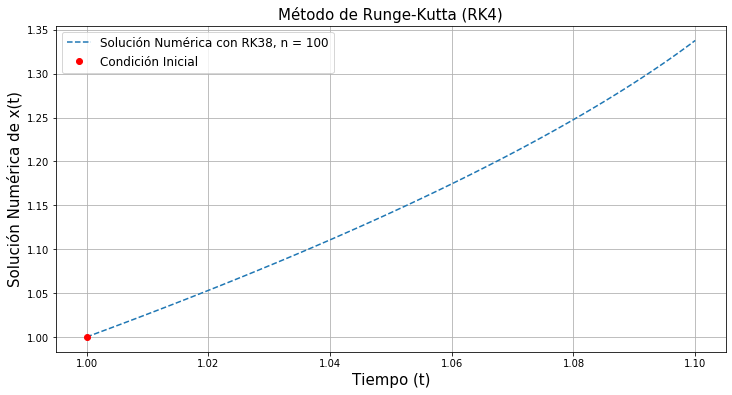

In [14]:
import numpy as np
import matplotlib.pyplot as plt
f = lambda t,x: np.tan(x)+1
x0=1
t0=1
tf=1.1
n=100
t,x=RK38(f,x0,t0,tf,n)
plt.figure(figsize=(12,6))
plt.plot(t,x,'--',label="Solución Numérica con RK38, n = "+str(n))
plt.plot(t[0],x[0],'ro', label="Condición Inicial")
plt.xlabel("Tiempo (t)",fontsize=15)
plt.ylabel("Solución Numérica de x(t)",fontsize=15)
plt.title("Método de Runge-Kutta (RK4)",fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

Ahora tenemos **muchos métodos numéricos a nuestra disposición** para resolver muchas ecuaciones diferenciales.

¡Buenas noticias!

### Tarea

Construya y programe los siguientes métodos numéricos usando la Tabla del Carnicero correspondiente:

- Heun.
- Punto Medio.
- Ralston.
- Dormand-Prince (Opcional).

Una todas esas definiciones y los métodos ya construídos (Euler, RK4, RK38) en un módulo llamado ```Solver_EDO```.

Resuelva las siguientes ecuaciones, usando cada método numérico  en el módulo creado y comparando los errores correspondientes.

1.
$$\frac{dP}{dt}=kP,\text{   }P(0)=2,\text{   en  }T=[0,100]$$
2.
$$\frac{dP}{dt}=kP\biggl(1-\frac{P}{S}\biggr),\text{   }P(0)=2,\text{   en  }T=[0,100],\text{   }S=100000$$
3.
$$\frac{dv}{dt}=g-\frac{c_d}{m}v^{2},\text{   }v(0)=-3,\text{   en  }T=[0,30]$$
4.
$$\frac{dx}{dt}=e^{-t^2}\sinh(x), \text{  }x(-5)=0$$
5.
$$\frac{dx}{dt}=\tanh(xt)+\ln(t^2)e^{-x^2}, \text{  }x(-1)=2$$

Decida cuál es el método numérico más apropiado para cada ecuación.